# Advertising Sales Prediction

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle

In [7]:
# Load the dataset
data = pd.read_csv('Advertising.csv')

In [8]:
# Drop any unnecessary columns (e.g., an index column)
data = data.drop('Unnamed: 0', axis=1)

# Check for missing values and handle them if necessary
data.isnull().sum()

# Handle data types, if needed
data['TV'] = data['TV'].astype(float)
data['Radio'] = data['Radio'].astype(float)
data['Newspaper'] = data['Newspaper'].astype(float)
data['Sales'] = data['Sales'].astype(float)

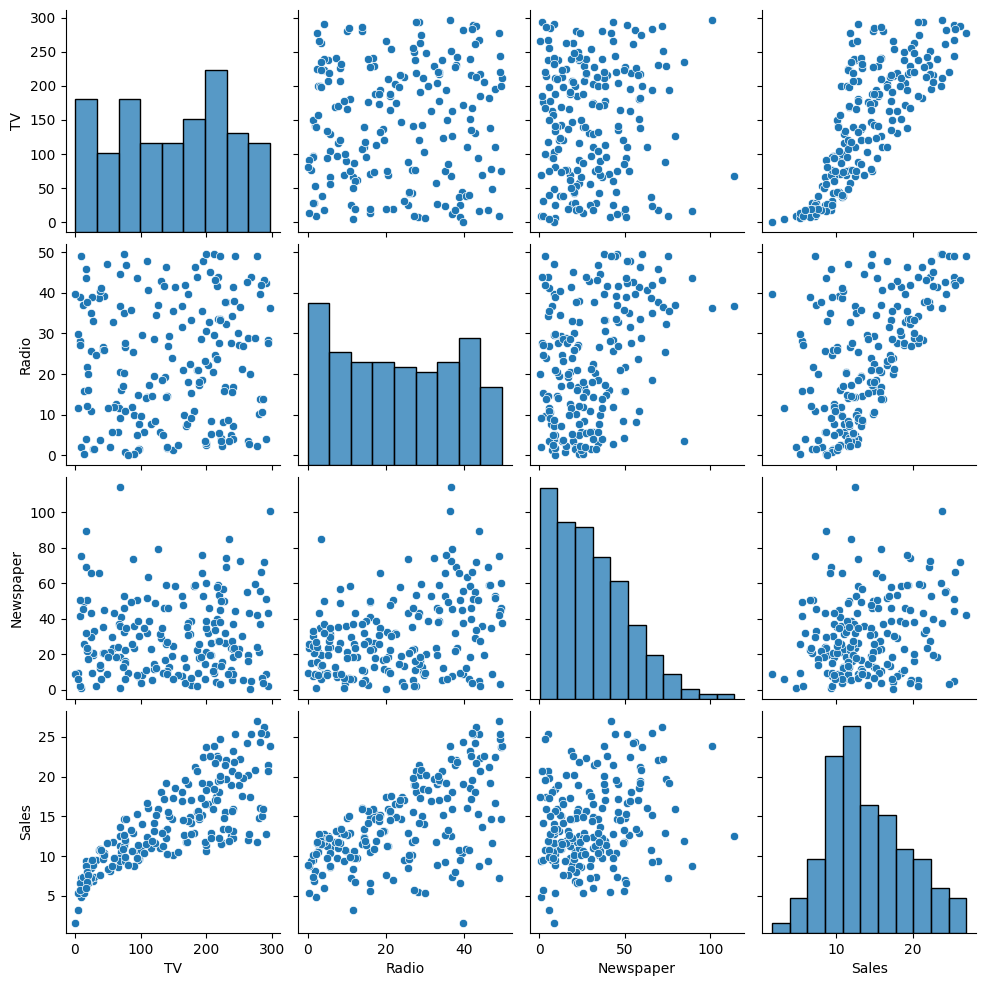

In [9]:
# Summary statistics
data.describe()

# Visualize relationships between variables
sns.pairplot(data)
plt.show()

In [10]:
# Assuming you have your features (X) and target variable (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# random_state is set for reproducibility; you can change it to any integer value

# Print the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (140, 3)
X_test shape: (60, 3)
y_train shape: (140,)
y_test shape: (60,)


In [11]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [12]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [13]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [15]:
svm_model = SVR()
svm_model.fit(X_train, y_train)

SVR()

In [16]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [17]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [18]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

In [19]:
en_model = ElasticNet()
en_model.fit(X_train, y_train)

ElasticNet()

In [20]:
mlp_model = MLPRegressor()
mlp_model.fit(X_train, y_train)

MLPRegressor()

In [21]:
# Dictionary to store evaluation results
evaluation_results = {}

# Define a function for evaluation
def evaluate_model(model, X_test, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results in the dictionary
    evaluation_results[model_name] = {
        'Mean Squared Error (MSE)': mse,
        'Root Mean Squared Error (RMSE)': rmse,
        'Mean Absolute Error (MAE)': mae,
        'R-squared (R2)': r2
    }

# Assuming you have X_test and y_test from the train-test split
for model, model_name in [(lr_model, 'Linear Regression'),
                         (dt_model, 'Decision Tree'),
                         (rf_model, 'Random Forest'),
                         (xgb_model, 'XGBoost'),
                         (svm_model, 'SVM'),
                         (knn_model, 'KNN'),
                         (lasso_model, 'Lasso Regression'),
                         (ridge_model, 'Ridge Regression'),
                         (en_model, 'Elastic Net'),
                         (mlp_model, 'Multi-layer Perceptron')]:
    evaluate_model(model, X_test, y_test, model_name)

# Print evaluation results
for model_name, metrics in evaluation_results.items():
    print(f'{model_name} Metrics:')
    for metric_name, value in metrics.items():
        print(f'{metric_name}: {value:.3f}')
    print()


Linear Regression Metrics:
Mean Squared Error (MSE): 3.797
Root Mean Squared Error (RMSE): 1.949
Mean Absolute Error (MAE): 1.512
R-squared (R2): 0.861

Decision Tree Metrics:
Mean Squared Error (MSE): 1.685
Root Mean Squared Error (RMSE): 1.298
Mean Absolute Error (MAE): 1.012
R-squared (R2): 0.938

Random Forest Metrics:
Mean Squared Error (MSE): 0.507
Root Mean Squared Error (RMSE): 0.712
Mean Absolute Error (MAE): 0.599
R-squared (R2): 0.981

XGBoost Metrics:
Mean Squared Error (MSE): 0.882
Root Mean Squared Error (RMSE): 0.939
Mean Absolute Error (MAE): 0.717
R-squared (R2): 0.968

SVM Metrics:
Mean Squared Error (MSE): 4.366
Root Mean Squared Error (RMSE): 2.089
Mean Absolute Error (MAE): 1.552
R-squared (R2): 0.840

KNN Metrics:
Mean Squared Error (MSE): 2.524
Root Mean Squared Error (RMSE): 1.589
Mean Absolute Error (MAE): 1.179
R-squared (R2): 0.908

Lasso Regression Metrics:
Mean Squared Error (MSE): 3.682
Root Mean Squared Error (RMSE): 1.919
Mean Absolute Error (MAE): 1.490

In [22]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error (MSE): 0.466833064256235
Root Mean Squared Error (RMSE): 0.6832518307741553
R-squared (R2): 0.982902773826412


In [23]:
# Save the best model with the best hyperparameters
best_model_filename = "best_random_forest_model.pkl"
with open(best_model_filename, "wb") as model_file:
    pickle.dump(best_model, model_file)

print(f"Best model with parameters saved as '{best_model_filename}'")

Best model with parameters saved as 'best_random_forest_model.pkl'


In [24]:
# Load the best model from the saved file
loaded_model = pickle.load(open(best_model_filename, "rb"))

# Example features for prediction
example_features = [[100, 20, 30]]  # Replace with your own example features

# Make predictions using the loaded model
predictions = loaded_model.predict(example_features)

# Print the predictions
print("Predicted Sales:", predictions)

Predicted Sales: [11.7135]


C:\Users\chakr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
